# Pymaceuticals Inc.
---

### Analysis

Bar Plot:

The Bar plot indicates that the drug regimens Capomulin and Ramicane had the most observations, with over 200 timepoints each, while the regimens Propriva and Stelasyn had the least number of timepoints, with fewer than 200 observations each.

Pie Plot:

The pie plot indicates that there were slightly more male mice than female mice in the study, with males comprising 51% of the total population and females comprising 49%.

Calculated Quartiles and Outliers:

The data show that the tumor volumes for the different drug regimens had a wide range of values, with some drugs having larger interquartile ranges (IQRs) than others. The box plots also highlight the presence of outlier, which are values that fall outside of the typical range of the data.

Line Plot:

The line plot shows the tumor volume vs. time point for one mouse treated with Capomulin. This visualization provides a detailed view of how the tumor volume changed over time for this particular mouse. The plot indicates that the tumor volume decreased over time for this mouse, suggesting that the Capomulin regimen was effective in suppressing tumor growth.

Correlation Coefficient and Linear Regression Model:

The correlation coefficient and linear regression model show that there is a strong positive correlation between mouse weight and average tumor volume for the Capomulin regimen. 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [34]:
# Checking the number of mice.
number = mouse_metadata["Mouse ID"].count()
number

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
filtered_study_results = merge_df.loc[(merge_df["Mouse ID"] == duplicate_mouse_ids[0])]
filtered_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
update_df = merge_df[merge_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
update_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [38]:
# Checking the number of mice in the clean DataFrame.
len(update_df["Mouse ID"].unique())

248

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

data_regimen = update_df.groupby("Drug Regimen")

# Calculate the desired summary statistics for the tumor volume
tumor_mean = data_regimen["Tumor Volume (mm3)"].mean()
tumor_median = data_regimen["Tumor Volume (mm3)"].median()
tumor_var = data_regimen["Tumor Volume (mm3)"].var()
tumor_std = data_regimen["Tumor Volume (mm3)"].std()
tumor_sem = data_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame
summary_df = pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

updated_summary_df = update_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    "mean", "median", "var", "std", "sem"
]).rename(columns={
    "mean": "Mean Tumor Volume",
    "median": "Median Tumor Volume",
    "var": "Tumor Volume Variance",
    "std": "Tumor Volume Std. Dev.",
    "sem": "Tumor Volume Std. Err."
})
updated_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

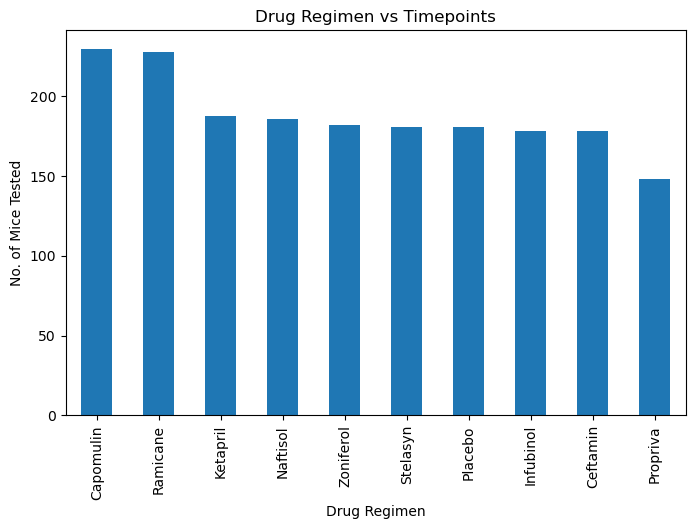

<Figure size 640x480 with 0 Axes>

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoint_counts = update_df["Drug Regimen"].value_counts()
chart = timepoint_counts.plot(kind='bar', figsize=(8,5))
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Mice Tested")
plt.title("Drug Regimen vs Timepoints")
plt.show()
plt.tight_layout()

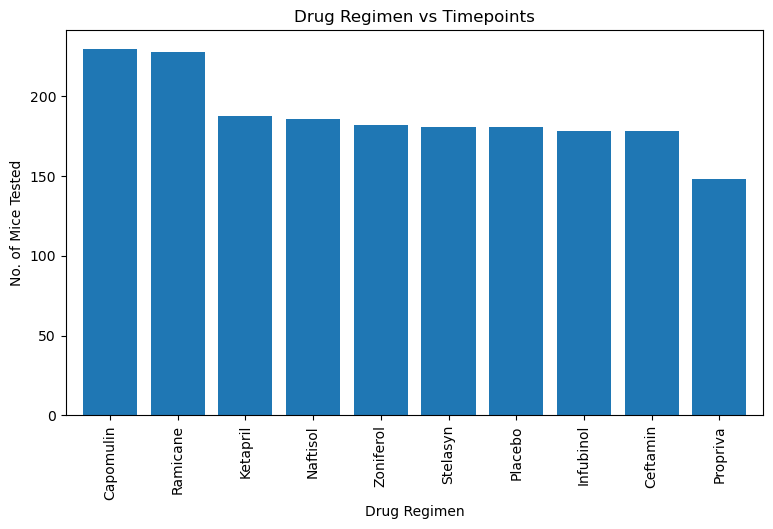

<Figure size 640x480 with 0 Axes>

In [42]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
pyplot_chart = timepoint_counts.plot(kind='bar', figsize=(9,5), title="Drug Regimen vs Timepoints",width=0.8, align="center")
pyplot_chart.set_xlabel("Drug Regimen")
pyplot_chart.set_ylabel("No. of Mice Tested")

plt.show()
plt.tight_layout()


(-1.099999829459579,
 1.099999925840278,
 -1.0999994453787694,
 1.0999999118116914)

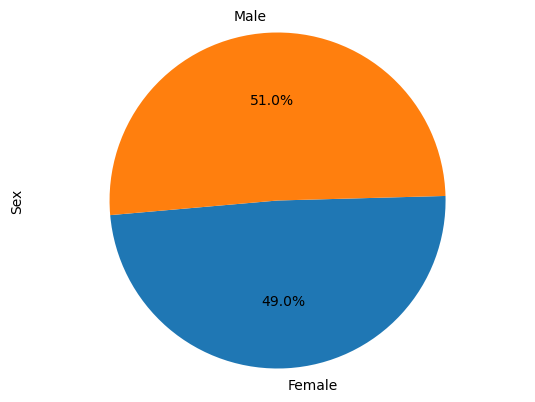

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = update_df.groupby('Sex')['Mouse ID'].count()
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%",  startangle=-175)
plt.ylabel("Sex")
plt.axis("equal")

(-1.0999999966554264,
 1.0999999297639522,
 -1.0999999100756188,
 1.0999999844482926)

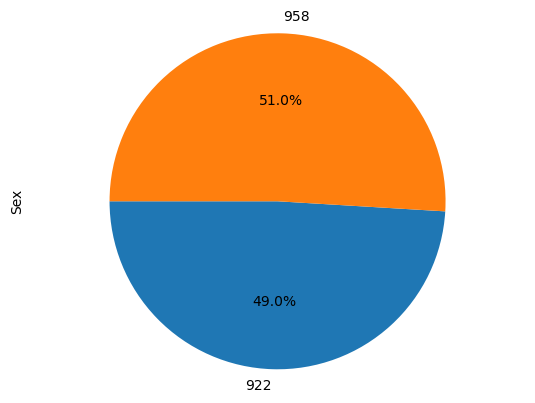

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%',startangle=-180)
plt.ylabel("Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_df = update_df.groupby("Mouse ID").max()[["Timepoint"]]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint_df = pd.merge(mouse_max_df, update_df, how="left", on=["Mouse ID", "Timepoint"])
final_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
key_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for regimen in key_regimens:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_s = final_timepoint_df["Drug Regimen"] == regimen
    regimen_final_df = final_timepoint_df[regimen_s]
    regimen_final_vol_s = regimen_final_df["Tumor Volume (mm3)"]
    tumor_vol_data.append(regimen_final_vol_s)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = regimen_final_vol_s.quantile([.25,.75])
    q1 = quartiles[0.25]
    q3 = quartiles[0.75]
    iqr = q3 - q1
    upper_bound = q3 + iqr*1.5
    lower_bound = q1 - iqr*1.5
    
 
    # add subset 
    upper_outlier_s = regimen_final_vol_s > upper_bound
    lower_outlier_s = regimen_final_vol_s < lower_bound
    outlier_s = regimen_final_vol_s[upper_outlier_s | lower_outlier_s ]
    print(f"{regimen}'s potential outlier: {outlier_s}")
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier: Series([], Name: Tumor Volume (mm3), dtype: float64)


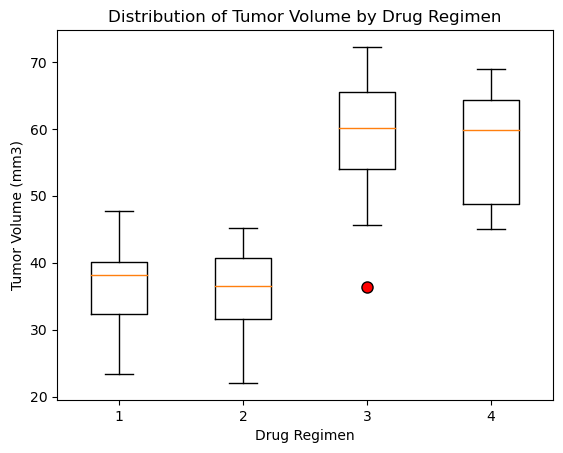

In [47]:
# set the color for outlier points
flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')

# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data,flierprops=flierprops)
# add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Drug Regimen")

# show the plot
plt.show()

## Line and Scatter Plots

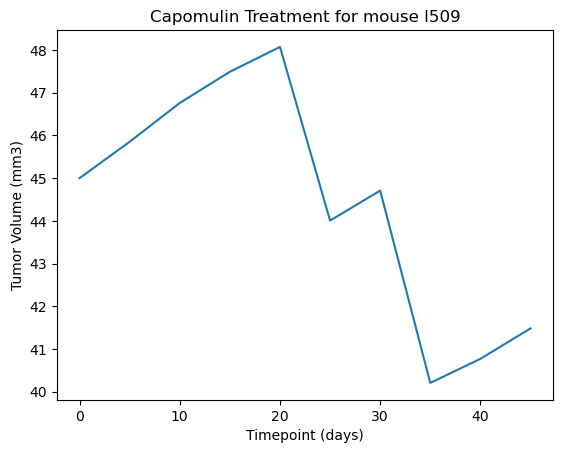

In [48]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = 'l509'
capomulin_data = update_df[update_df['Drug Regimen'] == 'Capomulin']
mouse_data = capomulin_data.loc[(capomulin_data['Mouse ID'] == mouse_id)]
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Add appropriate axis labels and a title to the plot
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for mouse {mouse_id}')

# Show the plot
plt.show()

/var/folders/82/mc6dzgyx499_p9sq6t16vv100000gn/T/ipykernel_44422/408410905.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_data = capomulin_data.groupby("Mouse ID").mean()


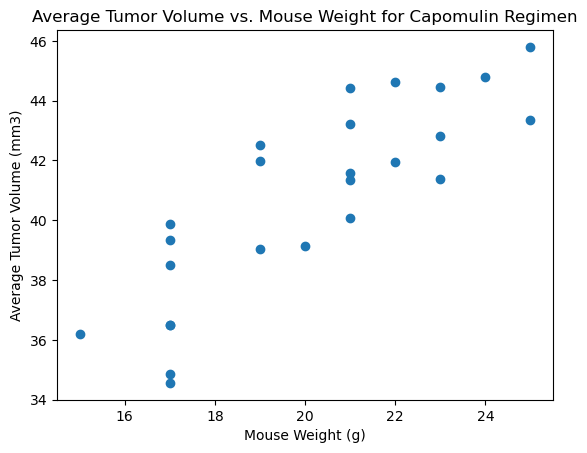

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

avg_data = capomulin_data.groupby("Mouse ID").mean()

# create a scatter plot
plt.scatter(avg_data["Weight (g)"], avg_data["Tumor Volume (mm3)"])

# add labels and title
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")

# show the plot
plt.show()

## Correlation and Regression

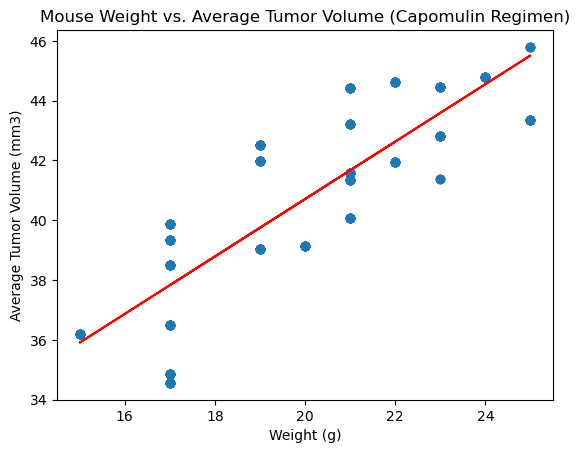

The correlation between mouse weight and the average tumor volume is 0.83


In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(avg_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID')

# Calculate the correlation coefficient
corr_coef = merged_data['Tumor Volume (mm3)'].corr(merged_data['Weight (g)'])

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the scatter plot
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the linear regression line
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='red')

# Add axis labels and a title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.show()

print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef,2)}")
